In [3]:
import numpy as np
import rasterio
from rasterio.plot import show
import os
import matplotlib.pyplot as plt
import rioxarray
import tifffile
from PIL import Image

In [4]:
root = '/home/tiago/workspace/valdoeiro/x7_'
dsm_file = os.path.join(root,'dsm_prj.tif')
ortho_file = os.path.join(root,'ortho.tif')

if not os.path.isfile(dsm_file) or not os.path.isfile(ortho_file):
    NameError("Path Does not exist!")

In [5]:
def show_shape(raster):
    image = raster.read()
    print(f"Raster shape: {raster.shape}")
    print(np.array(image).max())
    print(np.array(image).min())
    #show(raster)

DSM Files

In [7]:
dsm_rasterio = rasterio.open(dsm_file)

In [8]:
show_shape(dsm_rasterio)

Raster shape: (35283, 23419)
126.81295
-32767.0


In [9]:
ortho_rasterio = rasterio.open(ortho_file)


/home/tiago/.local/lib/python3.8/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [10]:
show_shape(ortho_rasterio)

Raster shape: (8820, 15613)
255
0


In [ ]:
from rasterio.warp import calculate_default_transform, reproject, Resampling
import os
dsm_prj_file = os.path.join(root,'dsm_prj.tif')


kwargs = dsm_rasterio.meta.copy()
kwargs.update({
    'crs': ortho_rasterio.crs,
    'transform': ortho_rasterio.transform,
    'width': ortho_rasterio.width,
    'height': ortho_rasterio.height
})

with rasterio.open(dsm_prj_file, 'w', **kwargs) as dst:
    reproject(
        source=rasterio.band(dsm_rasterio, 1),
        destination=rasterio.band(dst, 1),
        src_transform=dsm_rasterio.transform,
        src_crs=dsm_rasterio.crs,
        dst_transform=ortho_rasterio.transform,
        dst_crs=ortho_rasterio.crs,
        resampling=Resampling.nearest)
    

NameError: name 'root' is not defined

Raster shape: (14162, 15956)
255
0


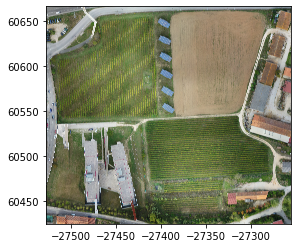

In [ ]:
ortho_rasterio = rasterio.open(ortho_file)
show_shape(ortho_rasterio)


Raster shape: (7081, 7978)
58.05879
22.62593


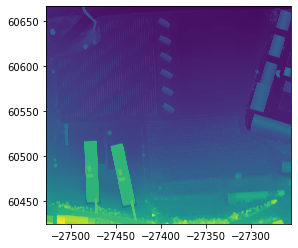

In [ ]:

dsm_rasterio = rasterio.open(dsm_file)
show_shape(dsm_rasterio)


Raster shape: (14162, 15956)
58.05879
22.62593


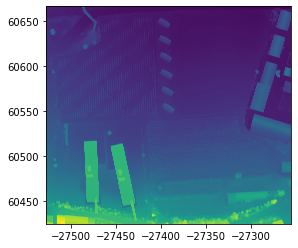

In [ ]:

#dsm_prj_file = '/home/tiago/workspace/esac/x7/dsm (copy).tif'
dsm_rasterio = rasterio.open(dsm_prj_file)
show_shape(dsm_rasterio)